2 [(0, 32), (32, 41), (69, 78), (207, 234), (365, 389), (466, 589)]
0
copying instance det 0 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/0


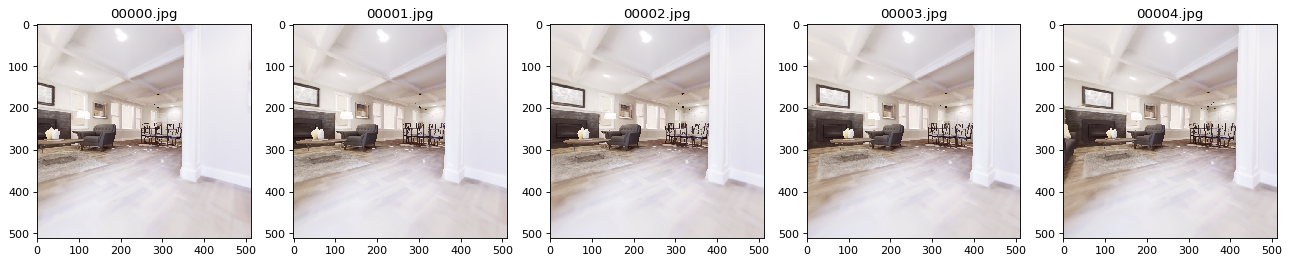

1
copying instance det 1 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/1


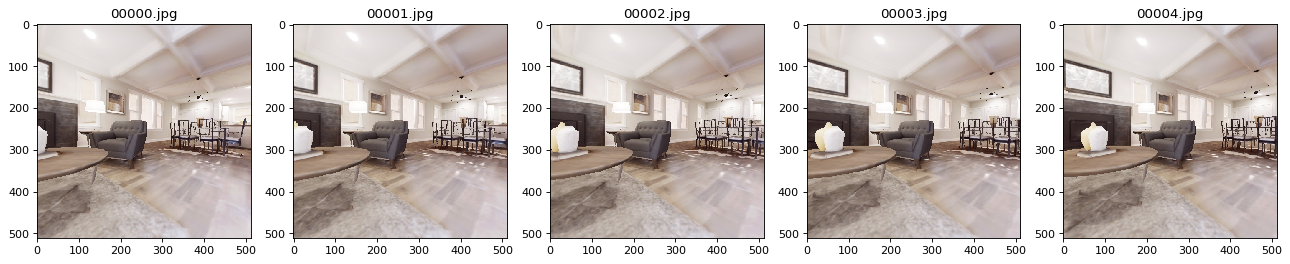

2
copying instance det 2 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/2


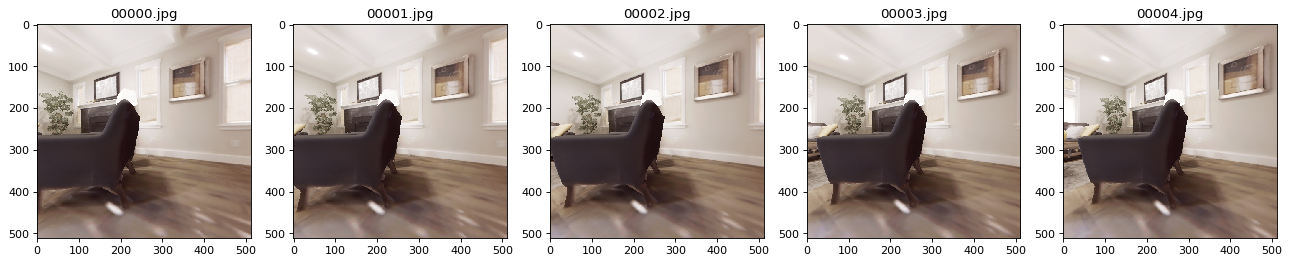

3
copying instance det 3 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/3


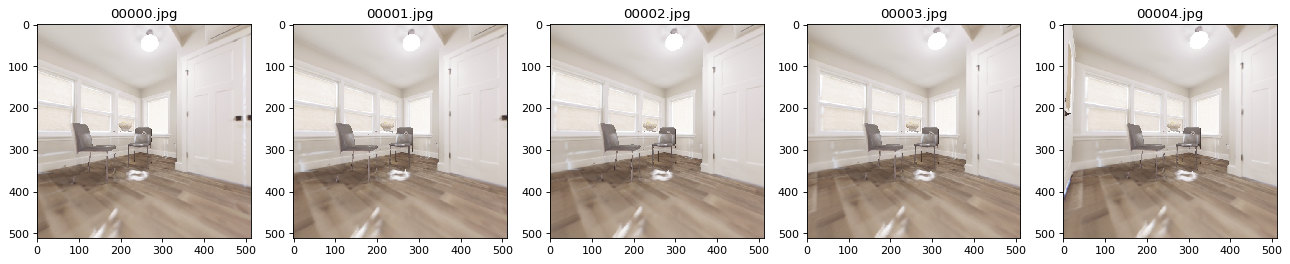

4
copying instance det 4 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/4


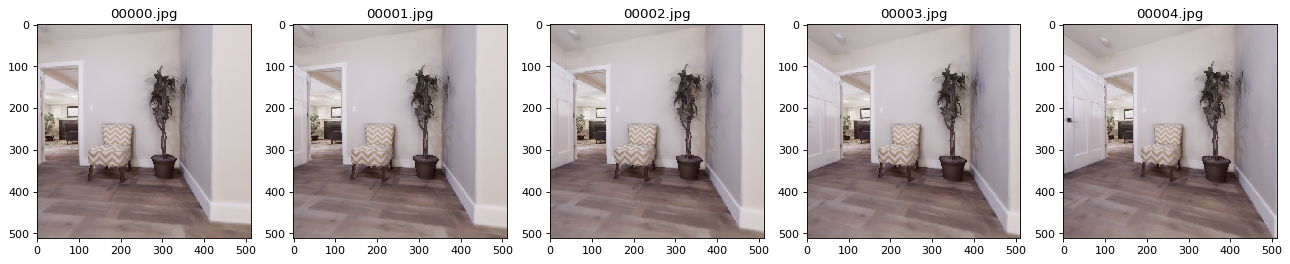

5
copying instance det 5 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/2/5


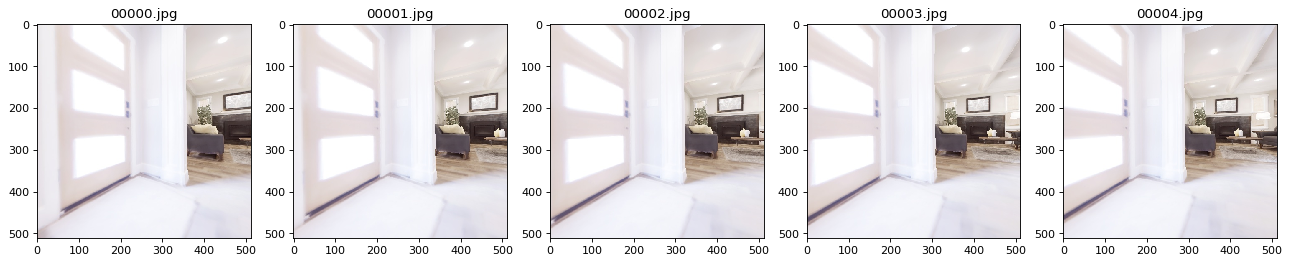

3 [(115, 173), (189, 237), (334, 397), (398, 419)]
0
copying instance det 0 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/3/0


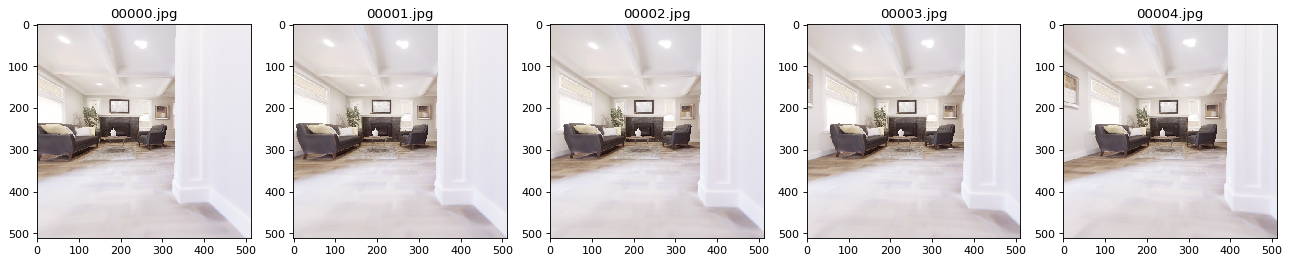

1
copying instance det 1 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/3/1


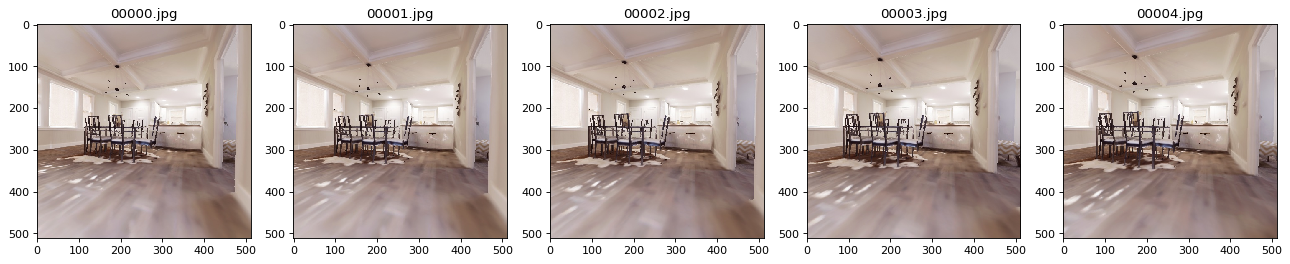

2
copying instance det 2 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/3/2


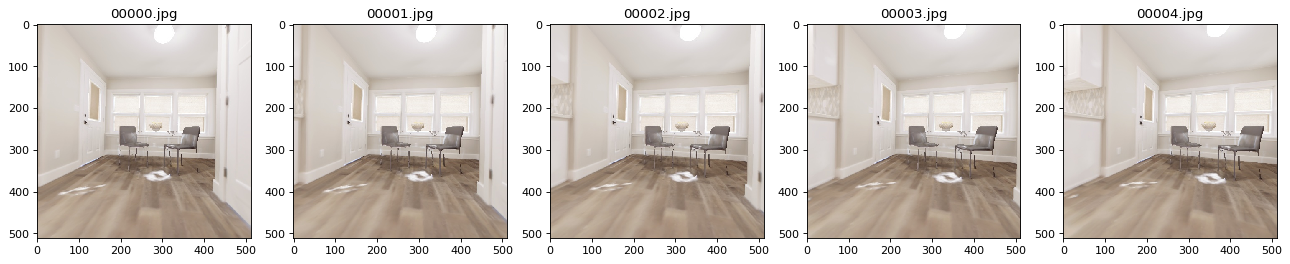

3
copying instance det 3 to /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection/3/3


In [ ]:
# now for each trajectory, take these image ranges, and create a folder for each instance id with rgb, depth, robot_pos
# plug each folder into the pipeline - where we pick GT frames do label prop and train

from shutil import copyfile, rmtree
import json
import os
import matplotlib.pyplot as plt
import cv2

def acopyjson(a, b, r):
    with open(a, "r") as f:
        dat = json.load(f)
    
    new_dat = {}
    ctr = 0 
    for x in range(r[0], r[1]+1):
        new_dat.update({ctr: dat[str(x)]})
        ctr += 1
    with open(b, "w") as fp:
        json.dump(new_dat, fp)


def acopydir(a, b, ext, r):
#     print(f'acopydir {r}')
    if not os.path.isdir(b):
        os.makedirs(b)    
    ctr = 0
    for x in range(r[0], r[1]+1):
        f = "{:05d}{}".format(x, ext)
#         print(f)
        copyfile(os.path.join(a,f), os.path.join(b,"{:05d}{}".format(ctr, ext)))
        ctr += 1
    

data_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019'
out_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection'

# Instance IDs we care about [193,404,196,172,243,133,129,170]

traj_ranges = {
    2: [(0,32), (32,41), (69,78), (207,234), (365,389), (466,589)],
    3: [(115,173), (189,237), (334,397), (398,419)],
    4: [(64,142), (387,447), (532,558)],
    5: [(27,60), (77,93), (149,209), (210,234), (249,272), (317,409), (671,704)],
}

for traj, ranges in traj_ranges.items():
    print(traj, ranges)
    traj_dir = os.path.join(data_dir, str(traj), 'activeonly')
    for i in range(len(ranges)):
        print(i)
        traj_out = os.path.join(out_dir, str(traj), str(i))
        print(f'copying instance det {i} to {traj_out}')
        if os.path.isdir(traj_out):
            rmtree(traj_out)
        os.makedirs(traj_out)
        
        # copy rgb, seg, depth and data.json
        acopydir(os.path.join(traj_dir, 'rgb'), os.path.join(traj_out, 'rgb'), '.jpg', ranges[i])   
        acopydir(os.path.join(traj_dir, 'depth'), os.path.join(traj_out, 'depth'), '.npy', ranges[i])
        acopydir(os.path.join(traj_dir, 'seg'), os.path.join(traj_out, 'seg'), '.npy', ranges[i])
        acopyjson(os.path.join(traj_dir, 'data.json'), os.path.join(traj_out, 'data.json'), ranges[i])
        
        # view 5 images from traj_out
        fig, axs = plt.subplots(1, 5, figsize=(20,8), dpi=80)
        imgs = os.listdir(os.path.join(traj_out, 'rgb'))
        for x in range(5):
            axs[x].imshow(cv2.cvtColor(cv2.imread(os.path.join(traj_out, 'rgb', imgs[x])), cv2.COLOR_BGR2RGB))
            axs[x].set_title(imgs[x])
        plt.show()
        